# THE SPARKS FOUNDATION

## DATA SCIENCE and BUSINESS ANALYTICS INTERNSHIP (GRIP MARCH '21)

### NAME: SHUBHAM UTTAMKUMAR DEY

### Task 6 --> Prediction using Decision Tree Algorithm

The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

#### Importing all required libraries

In [1]:
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

# import 'is_string_dtype' to check the string type 
from pandas.api.types import is_string_dtype

# import function to perform feature selection
from sklearn.feature_selection import RFE

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
import pydotplus
from pydotplus import graph_from_dot_data
from IPython.display import Image

#### Reading dataset Iris

In [2]:
df= pd.read_csv('Iris.csv',index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.100000,3.500000,1.400000,0.200000,Iris-setosa
2,4.900000,3.000000,1.400000,0.200000,Iris-setosa
3,4.700000,3.200000,1.300000,0.200000,Iris-setosa
4,4.600000,3.100000,1.500000,0.200000,Iris-setosa
5,5.000000,3.600000,1.400000,0.200000,Iris-setosa


In [3]:
# Checking for NULL values

df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
# Checking Datatypes

df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

#### Scaling the data

In [5]:
# Using Label Encoder to scale the data

LE = LabelEncoder()
df['Species'] = LE.fit_transform(df['Species'])


In [7]:
df.head(1)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.100000,3.500000,1.400000,0.200000,0


In [25]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [14]:
#creating X and Y dataset for model training 

X=df.drop(columns='Species',axis=1)
y=df.Species
print(X.head())
print(y.head())

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Id                                                          
1        5.100000      3.500000       1.400000      0.200000
2        4.900000      3.000000       1.400000      0.200000
3        4.700000      3.200000       1.300000      0.200000
4        4.600000      3.100000       1.500000      0.200000
5        5.000000      3.600000       1.400000      0.200000
Id
1    0
2    0
3    0
4    0
5    0
Name: Species, dtype: int32


In [15]:
#Spliting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)

In [17]:
X_train.shape

(105, 4)

In [18]:
X_test.shape

(45, 4)

In [19]:
y_test.shape

(45,)

In [20]:
y_train.shape

(105,)

In [16]:
#Applying Decsison Tree Classifer

decision_tree = DecisionTreeClassifier(random_state=10)

decision_tree = decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

In [22]:
y_pred

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

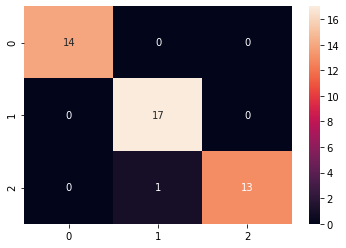

In [23]:
#using Confusion matrix to check classification
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

The confusion matrix shows thats that most of the classification is done correctly.

In [24]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


The model has an accuracy of 97.7%

#### Visualization of the Decision Tree

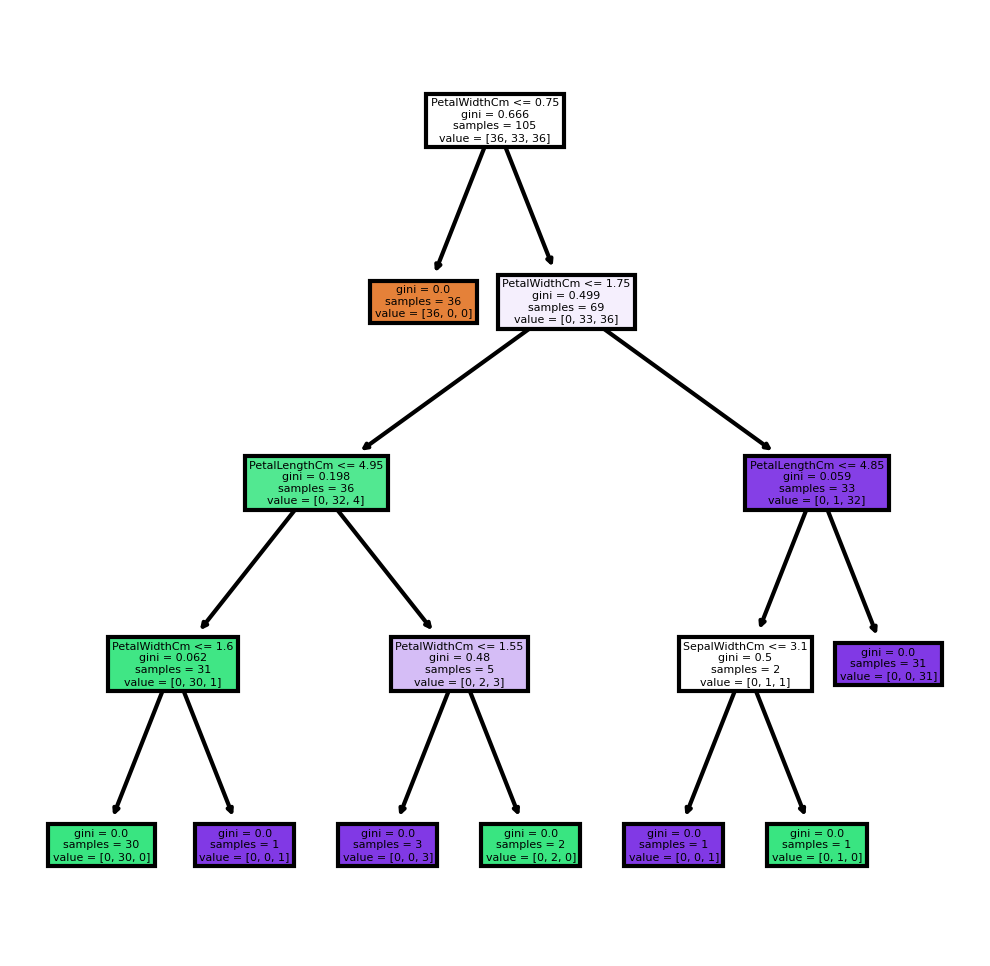

In [26]:
fn=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree,max_depth=5,
               feature_names = fn, 
               filled = True);

 The above diagram show the pictorial representaion of the decision tree

### Importing another dataset to test the Decision Tree Model

Using a seeds dataset to test the model

In [28]:
df2=pd.read_csv('seeds_dataset.csv')
df2.head()

,Area,Perimeter,Kernel_len,Kernel_width,Kernelgroove_len,Type
0,12.760000,13.380000,5.073000,3.155000,4.830000,0
1,12.130000,13.730000,5.394000,3.745000,5.220000,0
2,14.860000,14.670000,5.678000,3.258000,5.351000,0
3,15.690000,14.750000,5.527000,3.514000,5.046000,0
4,19.940000,16.920000,6.675000,3.763000,6.550000,1


In [32]:
X_new =df2.drop(columns=['Type','Area'],axis=1)
y_new=df2.Type

In [36]:
df2.columns

Index(['Area', 'Perimeter', 'Kernel_len', 'Kernel_width', 'Kernelgroove_len',
       'Type'],
      dtype='object')

In [33]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, random_state = 10, test_size = 0.3)

In [34]:
seed_new = decision_tree.predict(X_new_test)

In [35]:
seed_new

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

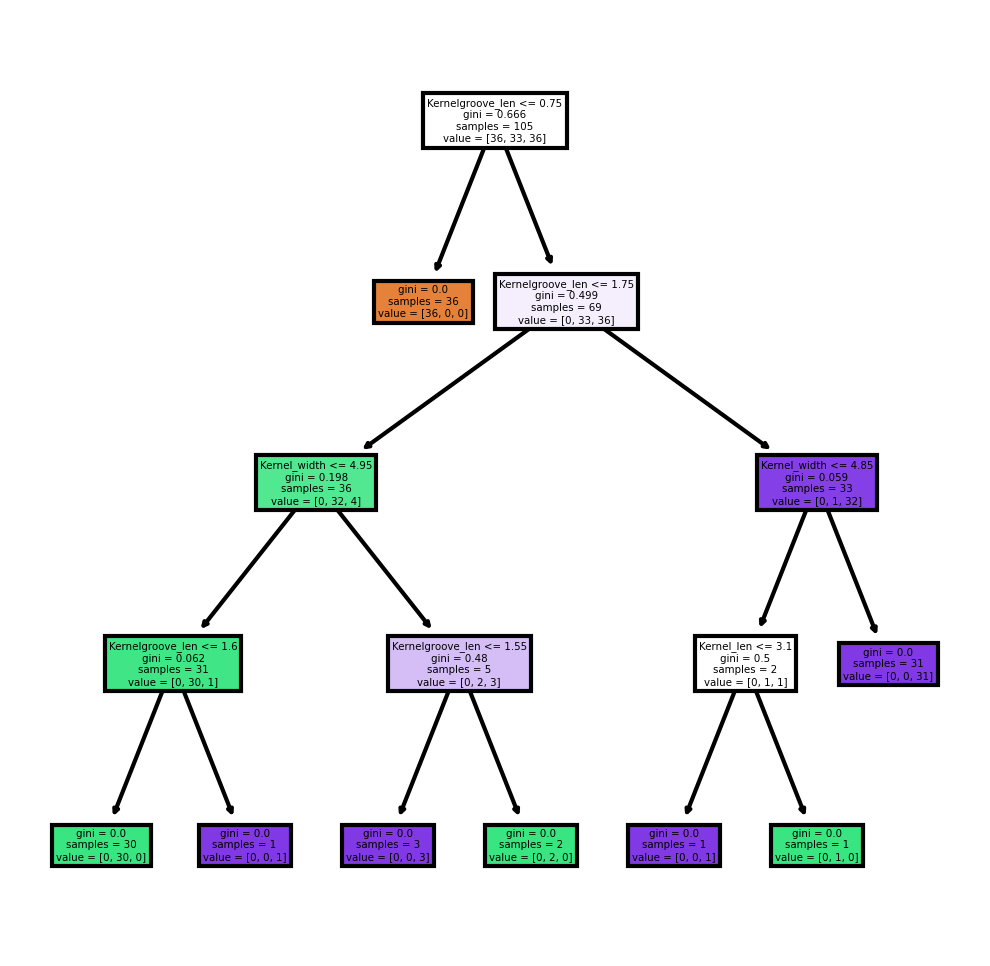

In [37]:
fn=['Perimeter', 'Kernel_len', 'Kernel_width', 'Kernelgroove_len']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree,max_depth=5,
               feature_names = fn, 
               filled = True);